In [12]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing

In [20]:
Housing=fetch_california_housing(as_frame=True)
df=Housing.frame
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [21]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [25]:
df.shape

(20640, 9)

In [29]:
df[df.duplicated] # for checking dupliccate values

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal


In [31]:
df.isnull().sum() # checking is there any null values or missing values

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [36]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

In [37]:
Out_col=['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal']

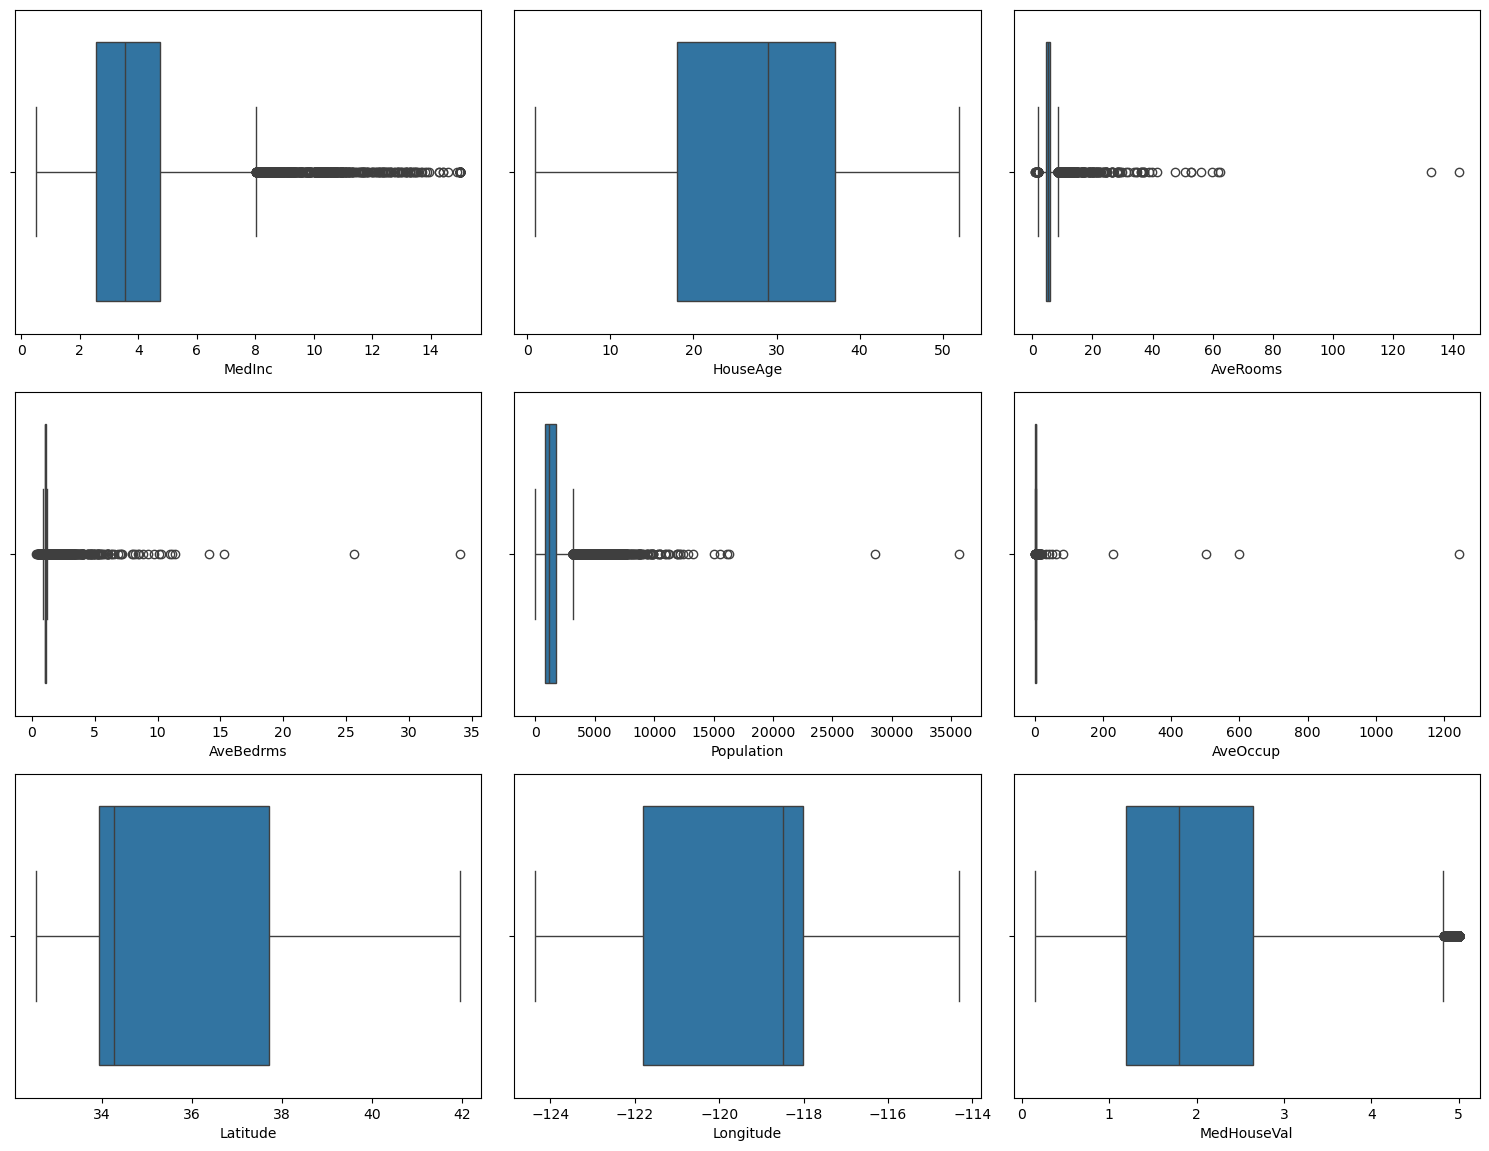

In [45]:
plt.figure(figsize=(15,15)) # for checking is there any outliers or not 
plotnumber=1
for col in Out_col:
    if plotnumber<15:
        ax=plt.subplot(4,3,plotnumber)
        sns.boxplot(data=df,x=col)

    plotnumber+=1
plt.tight_layout()

In [46]:
#creating a function for removing outliers

In [47]:
def remove_Outliers(data,col):
    q1,q2,q3=np.percentile(data[col],(25,50,75))
    IQR=q3-q1
    lower_limit=q1-(1.5*IQR)
    Upper_limit=q3+(1.5*IQR)
    data[col]=np.where(data[col]>Upper_limit,Upper_limit,data[col])
    data[col]=np.where(data[col]<lower_limit,lower_limit,data[col])

In [48]:
for col in Out_col:
    remove_Outliers(df,col)

In [50]:
df.info() # all values are numerical so no need to encode this

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


<Axes: >

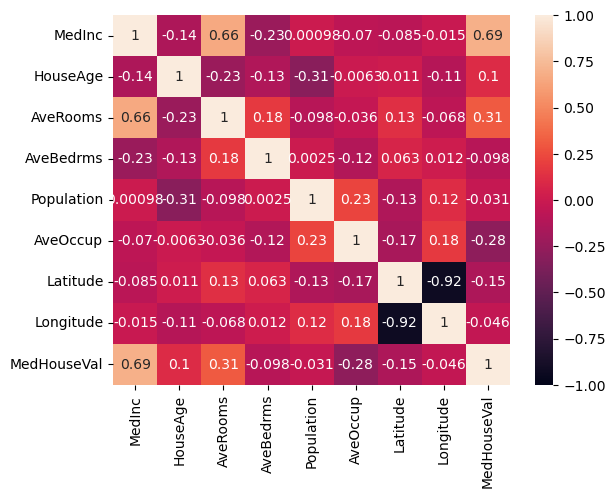

In [54]:
#feature selection
corr_matrix=df.corr()
sns.heatmap(corr_matrix,annot=True,vmin=-1,vmax=1)

In [55]:
#if there is any other correlation then drop the column

In [56]:
#Then splitting the data into dependent and independent vaiables

In [59]:
y=df["MedHouseVal"]
x=df.drop("MedHouseVal",axis=1)

In [60]:
x

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.013025,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.013025,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.257400,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.643100,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.846200,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.560300,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.556800,18.0,6.114035,1.239697,356.0,3.122807,39.49,-121.21
20637,1.700000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.867200,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [61]:
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64

In [66]:
#Scaling (setting data into a range)
from sklearn.preprocessing import MinMaxScaler,StandardScaler
normalization=StandardScaler()
x=normalization.fit_transform(x)
x=pd.DataFrame(x)
x

,0,1,2,3,4,5,6,7
0,2.541006,0.982143,1.347665,-0.424488,-1.325821,-0.497871,1.052548,-1.327835
1,2.541006,-0.607019,0.749027,-1.070004,1.389936,-1.142781,1.043185,-1.322844
2,2.085156,1.856182,2.394098,0.192534,-1.098528,-0.140910,1.038503,-1.332827
3,1.111288,1.856182,0.411358,0.187723,-1.017539,-0.508882,1.038503,-1.337818
4,0.027262,1.856182,0.784108,0.287439,-1.008395,-1.039145,1.038503,-1.337818
...,...,...,...,...,...,...,...,...
20635,-1.351765,-0.289187,-0.208070,0.936973,-0.642637,-0.490563,1.801647,-0.758826
20636,-0.750601,-0.845393,0.649438,2.259147,-1.281408,0.322894,1.806329,-0.818722
20637,-1.267488,-0.924851,-0.079603,0.772378,-0.431019,-0.830546,1.778237,-0.823713
20638,-1.166620,-0.845393,0.019880,1.416631,-0.778490,-1.123439,1.778237,-0.873626


In [71]:
#splitting the values for training and testing dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.33)


In [72]:
#Train the models

In [74]:
#Linear Regression : Here assume that data is perfectly following normally distribution and in simple linear model data is in a straight line and in polynomial model degrre is gearter than or equal to 2
from sklearn.linear_model import LinearRegression
ln=LinearRegression()
ln.fit(x_train,y_train)
y_pred=ln.predict(x_test)


In [75]:
# for evaluatiom we are using MSE (mean square error), MAE(mean absolute error), R^2 (R- Squared Score)
#MSE and MAE should be minimum and R2 value should be high for good accuracy,These are the average and absolute difference between the actual value and predicted value

In [76]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [79]:
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print(mae)
print(mse)
print(r2)

0.49126098010380725
0.43171173749250663
0.6636832679527921


In [80]:
#Decision Tree Regressor : a supervised learning algorithm used for regression tasks, predicting continuous target variables by creating a tree-like structure of decision rules derived from the input data features

In [82]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
y_pred=dtr.predict(x_test)

In [83]:
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print(mae)
print(mse)
print(r2)

0.47058323987081613
0.5277511959153404
0.58886557364604


In [84]:
#Random Forest Regressor: a meta estimator that fits a number of decision tree regressors on various sub-samples of the dataset and uses averaging to improve predictive accuracy and control overfitting

In [87]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

In [88]:
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print(mae)
print(mse)
print(r2)

0.3307253711391662
0.24708829029856838
0.8075106162204155


In [89]:
#Gradient Boosting Regressor: an ensemble machine learning technique that builds a predictive model by sequentially adding weak learners, typically decision trees, to correct the errors of the previous model

In [92]:
from sklearn.ensemble import GradientBoostingRegressor
gr=GradientBoostingRegressor()
gr.fit(x_train,y_train)
y_pred=gr.predict(x_test)

In [93]:
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print(mae)
print(mse)
print(r2)

0.3653254476989893
0.2770520147372664
0.7841679525677718


In [94]:
# Support Vector Regressor: a machine learning technique used for regression tasks, extending the principles of Support Vector Machines (SVMs) to predict continuous numeric values.

In [96]:
from sklearn.svm import SVR
sr=SVR()
sr.fit(x_train,y_train)
y_pred=sr.predict(x_test)

In [97]:
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print(mae)
print(mse)
print(r2)

0.3697925208376787
0.29892457512032033
0.7671285547689997


In [98]:
#By comparing these results its clear that RandomForestRegressor is the best bodel from here, because it has the high r2 value and less MSE, MAE values comparatively.And DecisionTreeRegressor is the worst one here, it has less r2 value and comparatively high MAE and MSE values
